# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [5]:
# Extract all rows of data
mars_df = soup.find('table', class_='table')
rows = mars_df.find_all('tr')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
row_text = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all('td')  # Find all cells (td tags) in the row
    if len(cells) > 0:  # If there are cells, process the row
        entry = {
            'id': int(cells[0].text.strip()),
            'terrestrial_date': cells[1].text.strip(),
            'sol': int(cells[2].text.strip()),
            'ls': int(cells[3].text.strip()),
            'month': int(cells[4].text.strip()),
            'min_temp': float(cells[5].text.strip()),
            'pressure': float(cells[6].text.strip())
        }
        row_text.append(entry) 

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

mars_weather_df = pd.DataFrame(row_text, columns=columns)


In [8]:
# Confirm DataFrame was created successfully
print(mars_weather_df)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_weather_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
# Change data types for data analysis

mars_weather_df['id'] = mars_weather_df['id'].astype('object')
mars_weather_df['terrestrial_date'] = mars_weather_df['terrestrial_date'].astype('datetime64[ns]')
mars_weather_df['sol'] = mars_weather_df['sol'].astype('int32')
mars_weather_df['ls'] = mars_weather_df['ls'].astype('int32')
mars_weather_df['month'] = mars_weather_df['month'].astype('int32')

In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars_weather_df["month"].nunique()

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
mars_weather_df["sol"].nunique()

1867

In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_weather_df.groupby("month")["min_temp"].mean()

Text(0, 0.5, 'Temperature Celsius')

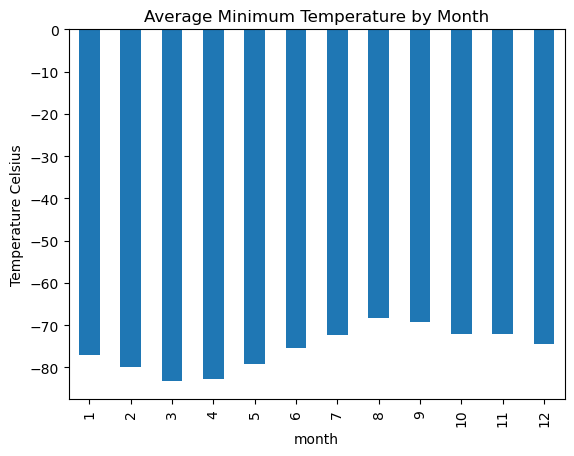

In [15]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind="bar")
plt.title("Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature Celsius")

Text(0, 0.5, 'Temperature Celsius')

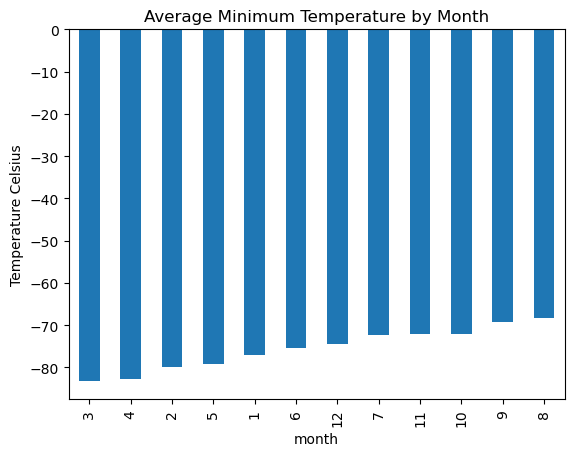

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp.sort_values().plot(kind="bar")
plt.title("Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature Celsius")

In [17]:
# 4. What is the average pressure by month?
avg_pressure = mars_weather_df.groupby("month")["pressure"].mean()

Text(0, 0.5, 'Atmospheric Pressure')

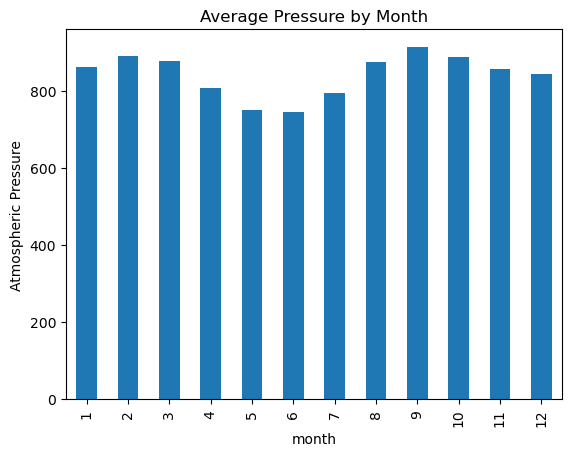

In [18]:
# Plot the average pressure by month
avg_pressure.plot(kind="bar")
plt.title("Average Pressure by Month")
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")

Text(0, 0.5, 'Atmospheric Pressure')

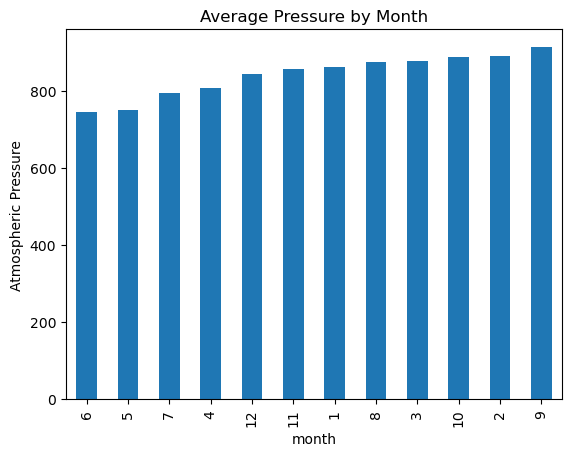

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure.sort_values().plot(kind="bar")
plt.title("Average Pressure by Month")
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")

Text(0, 0.5, 'Minimum temperature')

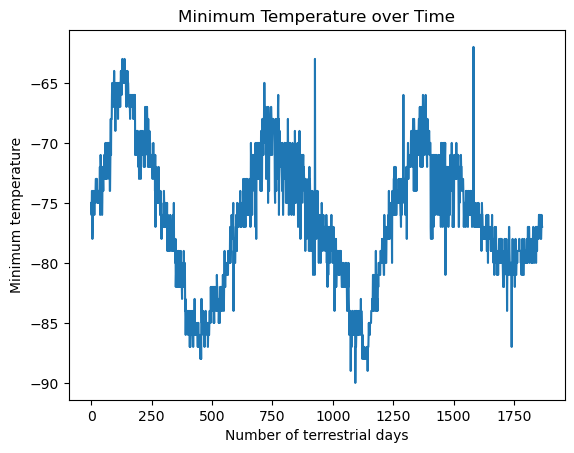

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_weather_df["min_temp"].plot()
plt.title("Minimum Temperature over Time")
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")


#### Minimum Temperature

Which month, on average, has the lowest temperature? The highest? 
     1. Lowest Temperature: 3rd month
     2. Highest Temperature: 8th month

#### Atmospheric Pressure

Which month, on average, has the lowest atmospheric pressure? The highest? 
      1. Lowest atmospheric pressure: 6th month
      2. Highest atmospheric pressure: 9th month


#### Year Length

How many months exist on Mars?
       - 12 months
How many Martian days' worth of data are there?
       - 1867 Martian days    
Which month, on average, has the lowest atmospheric pressure? The highest? 
       - It's largly between 670-675 terrestrial days

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_weather_df.to_csv("mars_weather.csv")

In [22]:
browser.quit()